# Impurity Model for nEXO

This analysis focuses on studying the impact of electronegative impurities in certain environments. We will go through a series of calculations and visual representations to understand this phenomenon better. See Ako Jamil's thesis for reference.

In [1]:
# Load packages.
import elec_neg_functions_tests as enf
import numpy as np
import matplotlib.pyplot as plt

# Global Constants.
M_nEXO = 5000  # in kg, LXe mass in nEXO
p_LXe = 5.5e-3  # in kg/liter, LXe density
M_XPM = 1.53  # in Kg, LXe mass in the XPM
C_el = 300  # in ppb/μs, constant for the XPM fits
T_room = 293  # in Kelvin, room temperature
T_LXe = 164  # in Kelvin, LXe temperature

# Modelling outgassing of impurities


Comparing to Ako's functions.

In [2]:
# Constants from p9 to 12 in "Outgassing model for electronegative impurities" (except height, given by andrea for exo200)
C0 = 943 / 1e9  # Initial oxygen concentration in PTFE (ppb)
D0 = 31.4 / 1e8  # Diffusion constant at infinite temperature (cm^2/s)
EA = 0.17 * 1.602176634e-19  # Activation energy (Joules)
D = 0.15  # Thickness of PTFE (cm)
RADIUS = 18.3  # Radius of the material (cm)
HEIGHT = 40  # Height of the material (cm)

# Surface area calculation
surface_area = 2 * np.pi * RADIUS * HEIGHT  # Surface area of contact (cm^2)

# Time arrays (incremented every hour)
t_short = np.arange(0, (2 * 24 * 60 * 60) + 1, 60 * 60)  # seconds
t_long = np.arange((2 * 24 * 60 * 60) + 1, (20 * 24 * 60 * 60) + 1, 60 * 60)  # seconds
t = np.arange(0, (20 * 24 * 60 * 60) + 1, 60 * 60)  # seconds

In [ ]:
# Constants from p9 to 12 in "Outgassing model for electronegative impurities" (except height, given by andrea for exo200)
S1 = enf.System(
    setup="EXO-200", material="Teflon", solute="Oxygen", version="EXO-Teflon"
)
S1.print_attributes()

# Define the temperatures, Should always be of type list.
Temperature = [164, 293]
S1.temperatures = Temperature

# Calculate diffusion constants and initial impurities.
S1.diffusion_constants = enf.get_diff_temp(S1, temperatures=S1.temperatures)
S1.initial_impurities = enf.get_initial_impurities(
    S1, units="ppb"
)  # VERIFIER COMMENT CA MARCHE CA

# Time arrays (incremented every hour)
t_short = np.arange(0, (2 * 24 * 60 * 60) + 1, 60 * 60)  # seconds
t_long = np.arange((2 * 24 * 60 * 60) + 1, (20 * 24 * 60 * 60) + 1, 60 * 60)  # seconds
t = np.arange(0, (20 * 24 * 60 * 60) + 1, 60 * 60)  # seconds

name: EXO-200
material: Teflon
solute: Oxygen
version: EXO-Teflon
constraints: []
constraint_index: []
diffusion: 3.14e-07
solubility: 0.22
activation_energy: 0.17
abundance: 0.21
molar_mass: 32
xe_mass: 200000
volume: 0.693
area: 9200.0
thickness: 0.15


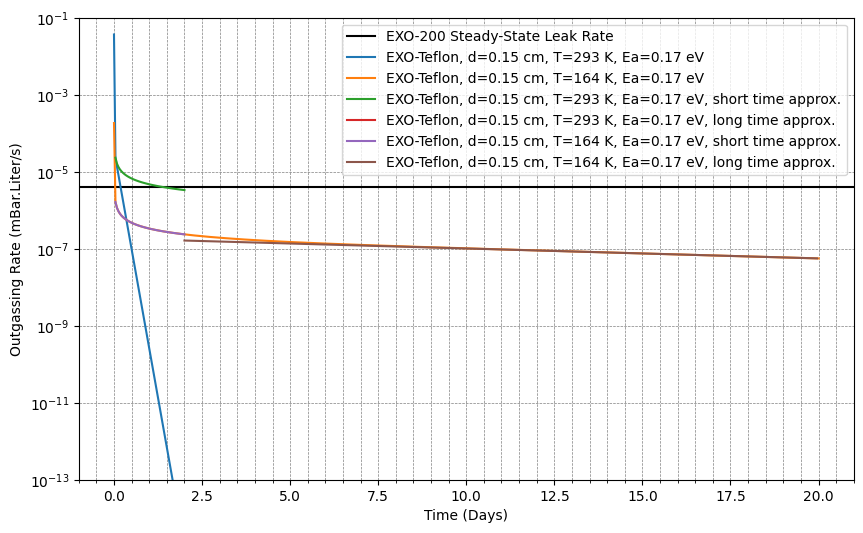

In [3]:
# Calculate outgassing rates using the optimized function
outgassing_rate_recirculated = [
    enf.plastics_outgassing(C0, D0, EA, T_room, D, sec, surface_area) for sec in t
]
outgassing_rate_cold = [
    enf.plastics_outgassing(C0, D0, EA, T_LXe, D, sec, surface_area) for sec in t
]

outgassing_rate_recirculated_approx = [
    enf.plastics_outgassing_approximation(
        C0, D0, EA, T_room, sec, D, surface_area, "short"
    )
    for sec in t_short
]
outgassing_rate_recirculated_approxlong = [
    enf.plastics_outgassing_approximation(
        C0, D0, EA, T_room, sec, D, surface_area, "long"
    )
    for sec in t_long
]

outgassing_rate_cold_approx = [
    enf.plastics_outgassing_approximation(
        C0, D0, EA, T_LXe, sec, D, surface_area, "short"
    )
    for sec in t_short
]
outgassing_rate_cold_approxlong = [
    enf.plastics_outgassing_approximation(
        C0, D0, EA, T_LXe, sec, D, surface_area, "long"
    )
    for sec in t_long
]

# Plotting
plt.figure(figsize=(10, 6))
plt.axhline(
    y=4e-6, color="black", linestyle="-", label="EXO-200 Steady-State Leak Rate"
)  # Adds a horizontal line across the axis at y = 4*10^-6
plt.plot(
    t / (24 * 60 * 60),
    outgassing_rate_recirculated,
    label=f"EXO-Teflon, d={D} cm, T={T_room} K, Ea={EA / 1.602176634e-19} eV",
)
plt.plot(
    t / (24 * 60 * 60),
    outgassing_rate_cold,
    label=f"EXO-Teflon, d={D} cm, T={T_LXe} K, Ea={EA / 1.602176634e-19} eV",
)

plt.plot(
    t_short / (24 * 60 * 60),
    outgassing_rate_recirculated_approx,
    label=f"EXO-Teflon, d={D} cm, T={T_room} K, Ea={EA / 1.602176634e-19} eV, short time approx.",
)
plt.plot(
    t_long / (24 * 60 * 60),
    outgassing_rate_recirculated_approxlong,
    label=f"EXO-Teflon, d={D} cm, T={T_room} K, Ea={EA / 1.602176634e-19} eV, long time approx.",
)

plt.plot(
    t_short / (24 * 60 * 60),
    outgassing_rate_cold_approx,
    label=f"EXO-Teflon, d={D} cm, T={T_LXe} K, Ea={EA / 1.602176634e-19} eV, short time approx.",
)
plt.plot(
    t_long / (24 * 60 * 60),
    outgassing_rate_cold_approxlong,
    label=f"EXO-Teflon, d={D} cm, T={T_LXe} K, Ea={EA / 1.602176634e-19} eV, long time approx.",
)

# plt.title('Outgassing Rate Over Time for EXO-200\'s PTFE (40 cm Height & 18.3 cm Radius Cylinder)')
plt.xlabel("Time (Days)")
plt.ylabel("Outgassing Rate (mBar.Liter/s)")
plt.yscale("log")
plt.legend()
plt.ylim(1e-13, 1e-1)
plt.grid(which="both", linestyle="--", linewidth="0.5", color="gray")
plt.minorticks_on()
plt.show()